In [1]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
#focus on emission cenc of greenhouse related and how it increased over time to how individual topics over time
# ryan and elizabeth is temp
# danyelle and i are just emissions over time
# statment: is the concentration of co2 and greenhosue gas emissions in our ozone/atmosphere 
# causing the human induced global temperature increase, are these two things correlated
# demonstrate waht it would be like if there were no people, if human activies are causing global warming
# how can we prove that? How do we show that its human and not nature
# 

In [2]:
file = 'Resources/historical_emissions.csv'

data_df = pd.read_csv(file)
data_df.head()

,Country,Data source,Sector,Gas,Unit,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Afghanistan,CAIT,Total including LUCF,CO2,MtCO₂e,7.38,7.39,7.99,7.81,8.51,...,0.82,1.05,1.10,1.18,1.25,1.30,1.36,1.43,2.74,2.96
1,Afghanistan,CAIT,Transportation,CO2,MtCO₂e,3.55,4.16,4.88,3.87,4.85,...,0.35,0.55,0.59,0.64,0.68,0.71,0.74,0.77,1.55,1.67
2,Albania,CAIT,Total including LUCF,CO2,MtCO₂e,5.20,4.54,4.68,4.82,4.40,...,3.06,1.88,1.56,2.05,2.03,2.22,2.15,2.32,4.19,6.13
3,Albania,CAIT,Transportation,CO2,MtCO₂e,2.30,2.29,2.44,2.47,2.46,...,1.40,0.74,0.49,0.62,0.63,0.63,0.51,0.41,0.54,0.71
4,Algeria,CAIT,Total including LUCF,CO2,MtCO₂e,144.66,142.91,145.53,138.37,129.47,...,78.42,75.42,73.71,72.29,73.93,72.43,74.35,67.04,67.82,68.77


In [3]:
total_df = data_df[(data_df =='Total including LUCF').any(axis=1)]

/Users/traex/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [4]:
total_df = total_df.set_index("Country")

# MtCO2e

In [5]:
cleaned_df = total_df.drop(['Data source','Sector','Gas','Unit'],axis = 1)
cleaned_df.head(-10)

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,7.38,7.39,7.99,7.81,8.51,10.45,12.26,8.67,6.00,4.39,...,0.82,1.05,1.10,1.18,1.25,1.30,1.36,1.43,2.74,2.96
Albania,5.20,4.54,4.68,4.82,4.40,4.18,4.70,4.33,4.07,3.92,...,3.06,1.88,1.56,2.05,2.03,2.22,2.15,2.32,4.19,6.13
Algeria,144.66,142.91,145.53,138.37,129.47,126.20,117.70,106.39,106.03,97.24,...,78.42,75.42,73.71,72.29,73.93,72.43,74.35,67.04,67.82,68.77
Andorra,NaN,0.45,0.44,0.44,0.45,0.47,0.47,0.48,0.48,0.50,...,0.49,0.47,0.45,0.43,0.41,0.39,0.39,0.39,0.39,0.39
Angola,104.65,109.21,127.43,111.90,123.91,110.94,135.91,111.39,108.16,104.25,...,92.11,95.39,91.13,93.64,97.56,93.47,93.68,93.14,93.30,93.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tuvalu,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,...,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Uganda,32.10,31.93,32.20,31.51,31.12,30.48,30.86,29.77,29.85,29.25,...,22.18,22.61,21.78,22.08,21.98,21.75,21.83,21.84,21.83,21.80
Ukraine,168.00,194.41,190.28,235.01,261.16,273.53,277.86,247.16,231.36,280.65,...,257.69,261.32,280.27,298.18,353.09,369.51,453.16,528.49,603.92,640.61


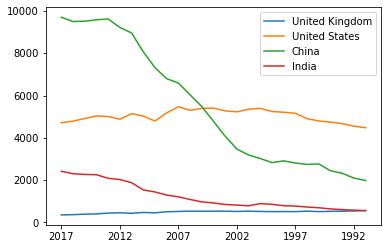

In [6]:
cleaned_df.loc['United Kingdom', "2017":"1991"].plot(label="United Kingdom")
cleaned_df.loc['United States', "2017":"1991"].plot(label="United States")
cleaned_df.loc['China',"2017":"1991"].plot(label='China')
cleaned_df.loc['India',"2017":"1991"].plot(label='India')
plt.legend()
plt.show()

In [7]:
cleaned_df.columns.tolist()

['2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 '1997',
 '1996',
 '1995',
 '1994',
 '1993',
 '1992',
 '1991',
 '1990']

In [8]:
reorg_df = cleaned_df.reindex(columns=['1990',
                                      '1991',
                                      '1992',
                                      '1993',
                                      '1994',
                                      '1995',
                                      '1996',
                                      '1997',
                                      '1998',
                                      '1999',
                                      '2001',
                                      '2002',
                                      '2003',
                                      '2004',
                                      '2005',
                                      '2006',
                                      '2007',
                                      '2008',
                                      '2009',
                                      '2010',
                                      '2011',
                                      '2012',
                                      '2013',
                                      '2014',
                                      '2015',
                                      '2016',
                                      '2017'])

In [9]:
reorg_df.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,2.96,2.74,1.43,1.36,1.30,1.25,1.18,1.10,1.05,0.82,...,4.39,6.00,8.67,12.26,10.45,8.51,7.81,7.99,7.39,7.38
Albania,6.13,4.19,2.32,2.15,2.22,2.03,2.05,1.56,1.88,3.06,...,3.92,4.07,4.33,4.70,4.18,4.40,4.82,4.68,4.54,5.20
Algeria,68.77,67.82,67.04,74.35,72.43,73.93,72.29,73.71,75.42,78.42,...,97.24,106.03,106.39,117.70,126.20,129.47,138.37,145.53,142.91,144.66
Andorra,0.39,0.39,0.39,0.39,0.39,0.41,0.43,0.45,0.47,0.49,...,0.50,0.48,0.48,0.47,0.47,0.45,0.44,0.44,0.45,NaN
Angola,93.10,93.30,93.14,93.68,93.47,97.56,93.64,91.13,95.39,92.11,...,104.25,108.16,111.39,135.91,110.94,123.91,111.90,127.43,109.21,104.65


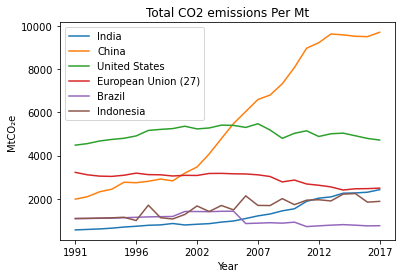

In [34]:
reorg_df.loc['India',"1991":"2017"].plot(label='India')
reorg_df.loc['China',"1991":"2017"].plot(label='China')
reorg_df.loc['United States',"1991":"2017"].plot(label='United States')
reorg_df.loc['European Union (27)',"1991":"2017"].plot(label='European Union (27)')
reorg_df.loc['Brazil',"1991":"2017"].plot(label='Brazil')
reorg_df.loc['Indonesia',"1991":"2017"].plot(label='Indonesia')

plt.legend()
plt.ylabel('MtCO₂e')
plt.xlabel('Year')
plt.title('Total CO2 emissions Per Mt')
plt.savefig('total.png')
plt.show()

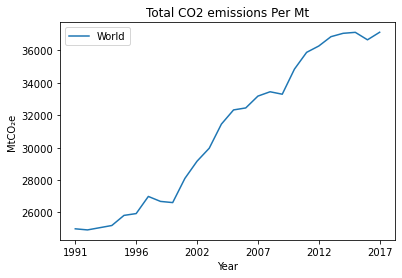

<Figure size 432x288 with 0 Axes>

In [35]:
reorg_df.loc['World',"1991":"2017"].plot(label='World')

plt.legend()
plt.ylabel('MtCO₂e')
plt.xlabel('Year')
plt.title('Total CO2 emissions Per Mt')
plt.show()
plt.savefig('world.png')

In [12]:
file2 = 'Resources/Trans and Industrial.csv'
df2= pd.read_csv(file2)
df2.head()

,Country,Data source,Sector,Gas,Unit,2017,2016,2015,2014,2013,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Afghanistan,CAIT,Industrial Processes,CO2,MtCO₂e,0.05,0.05,0.03,0.04,0.02,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04
1,Afghanistan,CAIT,Transportation,CO2,MtCO₂e,3.55,4.16,4.88,3.87,4.85,...,0.35,0.55,0.59,0.64,0.68,0.71,0.74,0.77,1.55,1.67
2,Albania,CAIT,Industrial Processes,CO2,MtCO₂e,1.26,1.26,1.25,1.10,1.15,...,0.05,0.04,0.05,0.10,0.10,0.05,0.10,0.10,0.30,0.37
3,Albania,CAIT,Transportation,CO2,MtCO₂e,2.30,2.29,2.44,2.47,2.46,...,1.40,0.74,0.49,0.62,0.63,0.63,0.51,0.41,0.54,0.71
4,Algeria,CAIT,Industrial Processes,CO2,MtCO₂e,9.16,9.16,9.16,8.36,7.30,...,3.44,3.45,3.27,3.01,3.17,2.82,2.99,3.00,2.97,2.99


In [15]:
trans_df = df2[(df2 =='Transportation').any(axis=1)]
indus_df = df2[(df2 =='Industrial Processes').any(axis=1)]
transportation_df = trans_df.set_index("Country")
industrial_df = indus_df.set_index("Country")


In [16]:
transportation_df.head()

,Data source,Sector,Gas,Unit,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,CAIT,Transportation,CO2,MtCO₂e,3.55,4.16,4.88,3.87,4.85,6.98,...,0.35,0.55,0.59,0.64,0.68,0.71,0.74,0.77,1.55,1.67
Albania,CAIT,Transportation,CO2,MtCO₂e,2.30,2.29,2.44,2.47,2.46,2.25,...,1.40,0.74,0.49,0.62,0.63,0.63,0.51,0.41,0.54,0.71
Algeria,CAIT,Transportation,CO2,MtCO₂e,44.69,45.19,46.41,43.51,40.26,38.64,...,16.47,15.46,15.01,14.96,15.11,15.52,16.96,16.80,16.88,15.81
Angola,CAIT,Transportation,CO2,MtCO₂e,6.72,7.91,7.98,7.94,7.70,6.74,...,1.16,0.83,1.05,0.99,1.07,1.54,1.21,1.19,1.26,1.02
Antigua and Barbuda,CAIT,Transportation,CO2,MtCO₂e,0.21,0.21,0.20,0.19,0.19,0.28,...,0.16,0.16,0.14,0.14,0.14,0.13,0.13,0.14,0.10,0.10


In [17]:
industrial_df

,Data source,Sector,Gas,Unit,2017,2016,2015,2014,2013,2012,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,CAIT,Industrial Processes,CO2,MtCO₂e,0.05,0.05,0.03,0.04,0.02,0.01,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04
Albania,CAIT,Industrial Processes,CO2,MtCO₂e,1.26,1.26,1.25,1.10,1.15,1.10,...,0.05,0.04,0.05,0.10,0.10,0.05,0.10,0.10,0.30,0.37
Algeria,CAIT,Industrial Processes,CO2,MtCO₂e,9.16,9.16,9.16,8.36,7.30,7.70,...,3.44,3.45,3.27,3.01,3.17,2.82,2.99,3.00,2.97,2.99
Angola,CAIT,Industrial Processes,CO2,MtCO₂e,0.95,0.95,0.99,0.97,0.78,0.61,...,0.08,0.14,0.12,0.11,0.08,0.10,0.10,0.12,0.11,0.11
Antigua and Barbuda,CAIT,Industrial Processes,CO2,MtCO₂e,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,CAIT,Industrial Processes,CO2,MtCO₂e,29.84,29.26,25.53,23.09,21.99,20.94,...,4.23,3.93,3.24,2.67,2.36,1.91,1.71,1.63,1.22,1.02
World,CAIT,Industrial Processes,CO2,MtCO₂e,1472.00,1461.00,1430.00,1471.00,1422.00,1371.00,...,684.90,655.80,658.80,639.70,626.40,592.10,556.20,536.00,514.30,501.30
Yemen,CAIT,Industrial Processes,CO2,MtCO₂e,0.76,0.76,0.98,0.98,1.15,0.96,...,0.57,0.47,0.49,0.41,0.44,0.32,0.33,0.33,0.35,0.35


In [18]:
cleaned_indus_df = industrial_df.drop(['Data source','Sector','Gas','Unit'],axis = 1)
cleaned_trans_df = transportation_df.drop(['Data source','Sector','Gas','Unit'],axis = 1)


In [19]:
cleaned_indus_df.head()

,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.05,0.05,0.03,0.04,0.02,0.01,0.01,0.01,0.01,0.01,...,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.04,0.04
Albania,1.26,1.26,1.25,1.10,1.15,1.10,0.90,0.65,0.55,0.46,...,0.05,0.04,0.05,0.10,0.10,0.05,0.10,0.10,0.30,0.37
Algeria,9.16,9.16,9.16,8.36,7.30,7.70,8.19,8.25,8.22,7.58,...,3.44,3.45,3.27,3.01,3.17,2.82,2.99,3.00,2.97,2.99
Angola,0.95,0.95,0.99,0.97,0.78,0.61,0.57,0.58,0.69,0.68,...,0.08,0.14,0.12,0.11,0.08,0.10,0.10,0.12,0.11,0.11
Antigua and Barbuda,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [20]:
reorg_indus = cleaned_indus_df.reindex(columns=['1990',
                                      '1991',
                                      '1992',
                                      '1993',
                                      '1994',
                                      '1995',
                                      '1996',
                                      '1997',
                                      '1998',
                                      '1999',
                                      '2001',
                                      '2002',
                                      '2003',
                                      '2004',
                                      '2005',
                                      '2006',
                                      '2007',
                                      '2008',
                                      '2009',
                                      '2010',
                                      '2011',
                                      '2012',
                                      '2013',
                                      '2014',
                                      '2015',
                                      '2016',
                                      '2017'])
reorg_trans = cleaned_trans_df.reindex(columns=['1990',
                                      '1991',
                                      '1992',
                                      '1993',
                                      '1994',
                                      '1995',
                                      '1996',
                                      '1997',
                                      '1998',
                                      '1999',
                                      '2001',
                                      '2002',
                                      '2003',
                                      '2004',
                                      '2005',
                                      '2006',
                                      '2007',
                                      '2008',
                                      '2009',
                                      '2010',
                                      '2011',
                                      '2012',
                                      '2013',
                                      '2014',
                                      '2015',
                                      '2016',
                                      '2017'])

In [21]:
reorg_indus.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.04,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,...,0.01,0.01,0.01,0.01,0.01,0.02,0.04,0.03,0.05,0.05
Albania,0.37,0.30,0.10,0.10,0.05,0.10,0.10,0.05,0.04,0.05,...,0.46,0.55,0.65,0.90,1.10,1.15,1.10,1.25,1.26,1.26
Algeria,2.99,2.97,3.00,2.99,2.82,3.17,3.01,3.27,3.45,3.44,...,7.58,8.22,8.25,8.19,7.70,7.30,8.36,9.16,9.16,9.16
Angola,0.11,0.11,0.12,0.10,0.10,0.08,0.11,0.12,0.14,0.08,...,0.68,0.69,0.58,0.57,0.61,0.78,0.97,0.99,0.95,0.95
Antigua and Barbuda,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [22]:
reorg_trans.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1.67,1.55,0.77,0.74,0.71,0.68,0.64,0.59,0.55,0.35,...,2.86,3.90,5.97,7.79,6.98,4.85,3.87,4.88,4.16,3.55
Albania,0.71,0.54,0.41,0.51,0.63,0.63,0.62,0.49,0.74,1.40,...,2.28,2.30,2.23,2.35,2.25,2.46,2.47,2.44,2.29,2.30
Algeria,15.81,16.88,16.80,16.96,15.52,15.11,14.96,15.01,15.46,16.47,...,29.19,30.52,31.71,34.22,38.64,40.26,43.51,46.41,45.19,44.69
Angola,1.02,1.26,1.19,1.21,1.54,1.07,0.99,1.05,0.83,1.16,...,5.20,5.76,6.48,7.17,6.74,7.70,7.94,7.98,7.91,6.72
Antigua and Barbuda,0.10,0.10,0.14,0.13,0.13,0.14,0.14,0.14,0.16,0.16,...,0.20,0.61,0.19,0.19,0.28,0.19,0.19,0.20,0.21,0.21


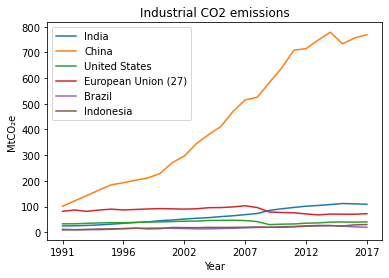

<Figure size 432x288 with 0 Axes>

In [33]:
reorg_indus.loc['India',"1991":"2017"].plot(label='India')
reorg_indus.loc['China',"1991":"2017"].plot(label='China')
reorg_indus.loc['United States',"1991":"2017"].plot(label='United States')
reorg_indus.loc['European Union (27)',"1991":"2017"].plot(label='European Union (27)')
reorg_indus.loc['Brazil',"1991":"2017"].plot(label='Brazil')
reorg_indus.loc['Indonesia',"1991":"2017"].plot(label='Indonesia')

plt.legend()
plt.ylabel('MtCO₂e')
plt.xlabel('Year')
plt.title('Industrial CO2 emissions')
plt.show()
plt.savefig('Industrial_emissions.png')

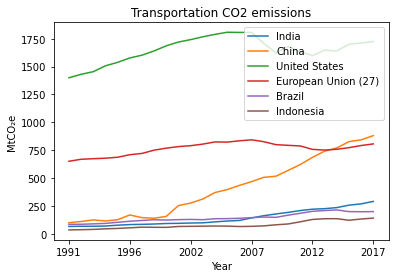

<Figure size 432x288 with 0 Axes>

In [36]:
reorg_trans.loc['India',"1991":"2017"].plot(label='India')
reorg_trans.loc['China',"1991":"2017"].plot(label='China')
reorg_trans.loc['United States',"1991":"2017"].plot(label='United States')
reorg_trans.loc['European Union (27)',"1991":"2017"].plot(label='European Union (27)')
reorg_trans.loc['Brazil',"1991":"2017"].plot(label='Brazil')
reorg_trans.loc['Indonesia',"1991":"2017"].plot(label='Indonesia')

plt.legend()
plt.ylabel('MtCO₂e')
plt.xlabel('Year')
plt.title('Transportation CO2 emissions')
plt.show()
plt.savefig('transportation.png')

In [37]:
file3 = 'Resources/emissions_data.csv'
emissions_df = pd.read_csv(file3)
emissions_df.head()

,Country,1751,1752,1753,1754,1755,1756,1757,1758,1759,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
1,Africa,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
2,Albania,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
3,Algeria,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
4,Americas (other),0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10


In [38]:
emissions_df.set_index("Country")

,1751,1752,1753,1754,1755,1756,1757,1758,1759,1760,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,8.515264e+07,9.191295e+07,1.003652e+08,1.125912e+08,1.233332e+08,1.333337e+08,1.431228e+08,1.532303e+08,1.654882e+08,1.785029e+08
Africa,0,0,0,0,0,0,0,0,0,0,...,3.183077e+10,3.301904e+10,3.421283e+10,3.541120e+10,3.664504e+10,3.789569e+10,3.918617e+10,4.047518e+10,4.178583e+10,4.311757e+10
Albania,0,0,0,0,0,0,0,0,0,0,...,2.287948e+08,2.331696e+08,2.377643e+08,2.430001e+08,2.479062e+08,2.529662e+08,2.586784e+08,2.646261e+08,2.708990e+08,2.772782e+08
Algeria,0,0,0,0,0,0,0,0,0,0,...,2.894820e+09,3.015005e+09,3.132819e+09,3.252626e+09,3.380736e+09,3.513171e+09,3.656348e+09,3.806940e+09,3.957319e+09,4.107870e+09
Americas (other),0,0,0,0,0,0,0,0,0,0,...,7.746025e+10,7.961787e+10,8.187178e+10,8.416656e+10,8.654197e+10,8.894874e+10,9.139192e+10,9.382747e+10,9.624253e+10,9.864116e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wallis and Futuna Islands,0,0,0,0,0,0,0,0,0,0,...,2.015200e+05,2.308320e+05,2.601440e+05,2.857920e+05,3.114400e+05,3.334240e+05,3.554080e+05,3.793990e+05,4.036640e+05,4.295730e+05
World,9350528,18704720,28058912,37416768,46778288,56784672,66794720,76808432,86825808,96843184,...,1.260000e+12,1.290000e+12,1.330000e+12,1.360000e+12,1.400000e+12,1.430000e+12,1.470000e+12,1.500000e+12,1.540000e+12,1.580000e+12
Yemen,0,0,0,0,0,0,0,0,0,0,...,4.285533e+08,4.528009e+08,4.759527e+08,4.954658e+08,5.137040e+08,5.386844e+08,5.609470e+08,5.813316e+08,6.004670e+08,6.194328e+08


In [41]:
emissions_df.loc['C','1751':'2017'].plot(label='World')

KeyError: 'World'